<a href="https://colab.research.google.com/github/dipashreepatil/AML-learning-mlds-/blob/main/Copy_of_twitter_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import os
import tweepy as tw
import pandas as pd

In [2]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive

path = './content/gdrive/My Drive/B-Tech Project 20-21 Group 7/NLP'

Mounted at /content/gdrive


In [3]:

api_key = 'bXa3bAs7M4O1d9a3wCyYRq5dn'

api_secret_key = 'IMXOI0vFU9KhN8Fnjm04K7NCRK6EGy5nxSUuh8FR07s78pHd65'

access_token = '1300274872958873600-bMOVNLomg5ZZxLLA19AMShgGxB3Xrw'
access_token_secret = 'oN3gya8E0OVJVD6Q2UTlMJrWrHAELy115qngQweYI80CJ'


# Connect to Twitter API using the secrets
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True) #wait_on_rate_limit=True to avoid tweeter error status code 429

In [4]:
#@title Default title text
search_words = "Apple Stocks" #@param {type:"string"}
max_tweets =  1000#@param {type:"integer"}
# search_words = input("Enter the query: ") 
# max_tweets = int(input("Enter the max tweets to fetch: "))
date_since = "2019-06-01"
# Filter out the duplicates
# new_search = search_words + " -filter:retweets"
# new_search


In [5]:
# Collect tweets and store in json file
# Creating a list of lists to store the parameters of tweets like id,text,retweet_count etc.
tweets_data = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(100)
tweets_list=[]


with open('tweets_json.json', 'w', encoding='utf8') as file:      
  for tweet in tweets_data:         
    json.dump(tweet._json, file)
    file.write('\n')

    lst = []
    lst.extend((tweet.id,tweet.created_at,tweet.text,tweet.place,tweet.retweet_count,tweet.favorite_count))
    tweets_list.append(lst)
    

In [ ]:
#print(tweet_text)
#print(tweet_id)
#print(tweet_created_at)
#print(tweet_place)
#print(tweet_retweet_count)
#print(tweet_retweet_count)


In [ ]:
#print(tweets_list)

In [8]:
#@title Default title text
#converting list of lists to csv file

df = pd.DataFrame(tweets_list, columns = ['ID','Date','text','place','retweets','favorites'])
# df.to_csv('tweets_csv.csv', index=False, header=["id","created_at","text","place","retweet_count","favourite count"])
df.to_csv('/content/gdrive/MyDrive/B-Tech Project 20-21 Group 7/NLP datasets/{}-{}k-tweets-from-to-around-region.csv'.format(search_words, int(max_tweets/1000)), sep=',')

In [10]:

import pandas as pd
df1 = pd.read_csv("/content/gdrive/MyDrive/B-Tech Project 20-21 Group 7/NLP datasets/Apple Stocks-1k-tweets-from-to-around-region.csv", encoding = 'unicode_escape')


In [11]:
df1.head()

,Unnamed: 0,ID,Date,text,place,retweets,favorites
0,0,1340180909576904704,2020-12-19 06:23:22,ð Thereâs a Holiday Event going on in the...,NaN,0,0
1,1,1340178387361550338,2020-12-19 06:13:21,apple stocks rise by 35%.,NaN,0,0
2,2,1340177440585494529,2020-12-19 06:09:35,TIL you can use multi touch to compare price a...,NaN,0,0
3,3,1340174982912077832,2020-12-19 05:59:49,RT @333Crypto: Synthetix Network Token (SNX) t...,NaN,1,0
4,4,1340172930274054144,2020-12-19 05:51:40,ð Thereâs a Holiday Event going on in the...,NaN,0,0


In [12]:
print(df1.columns)

Index(['Unnamed: 0', 'ID', 'Date', 'text', 'place', 'retweets', 'favorites'], dtype='object')


In [13]:
print(df1['text'].isna().sum())

0


In [14]:
import re
for i in range(len(df1)):
     txt = df1.loc[i]["text"]
     txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt)#replace username-tags
     txt=re.sub(r'^[RT]+','',txt)#replace RT-tags
     txt = re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
     txt=re.sub("[^a-zA-Z]", " ",txt)#replace hashtags
     df1.at[i,"text"]=txt

In [15]:
df1=df1.drop_duplicates(['text'])

In [16]:
df1.head(10)

,Unnamed: 0,ID,Date,text,place,retweets,favorites
0,0,1340180909576904704,2020-12-19 06:23:22,There s a Holiday Event going on in the...,NaN,0,0
1,1,1340178387361550338,2020-12-19 06:13:21,apple stocks rise by,NaN,0,0
2,2,1340177440585494529,2020-12-19 06:09:35,IL you can use multi touch to compare price ac...,NaN,0,0
3,3,1340174982912077832,2020-12-19 05:59:49,Synthetix Network Token SNX to list Synthe...,NaN,1,0
5,5,1340171643532931073,2020-12-19 05:46:33,Synthetix Network Token SNX to list Syntheti...,NaN,1,9
14,14,1340152652932542465,2020-12-19 04:31:05,Highest market cap in billions among stocks...,NaN,1,0
16,16,1340146857595424774,2020-12-19 04:08:04,Apple AAPL With USD x With ...,NaN,1,0
17,17,1340146739823579136,2020-12-19 04:07:36,Facebook FB With USD x Wi...,NaN,0,0
19,19,1340145010822569985,2020-12-19 04:00:43,Highest market cap in billions among stocks ...,NaN,1,1
20,20,1340141842726174720,2020-12-19 03:48:08,Yup Apple and Microsoft making their own ...,NaN,0,0


In [17]:
print(len(df1.index))
serlis=df1.duplicated().tolist()
print(serlis.count(True))#0
serlis=df1.duplicated(['text']).tolist()
print(serlis.count(True))#0

39
0
0


In [18]:
df1['text'][10:50]

26          Count Santula  they will buy Apple Stocks  
28     They are archive stocks  Put them in a safe t...
29    He bought me Tesla and apple stocks as one of ...
30     You can invest at the safe table and buy stoc...
34      this is a default ass screenshot of apple st...
35     After hours trading clawed back  I   m not in...
36      Weekly  Dec          S amp P      SP     Top...
38      Weekly  Dec          S amp P      SP     Top...
46    Weekly  Dec          S amp P      SP     Top  ...
54     Bubble  Nobody on this thread owns    Maybe  ...
55    Aside from the dominant stock names  Vanguard ...
56      Weekly  Dec           NASDAQ      NASDAQ    ...
59      Weekly  Dec           NASDAQ      NASDAQ    ...
62      Weekly  Dec          S amp P      SP     Top...
63      Weekly  Dec          S amp P      SP     Top...
65    Weekly  Dec          S amp P      SP     Top  ...
72    Weekly  Dec           NASDAQ      NASDAQ     T...
80      Weekly  Dec           NASDAQ      NASDAQ

In [20]:
df1.count()

Unnamed: 0    39
ID            39
Date          39
text          39
place          2
retweets      39
favorites     39
dtype: int64

In [19]:
df1['text'][50:]

Series([], Name: text, dtype: object)

Preprocessing


In [21]:
!pip install tweet-preprocessor


In [22]:
import preprocessor as p

In [23]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
df1.count()

Unnamed: 0    39
ID            39
Date          39
text          39
place          2
retweets      39
favorites     39
dtype: int64

In [25]:
df1['preTweets'] = df1['text']
df1.preTweets.head()

0         There   s a Holiday Event going on in the...
1                            apple stocks rise by     
2    IL you can use multi touch to compare price ac...
3      Synthetix Network Token  SNX  to list Synthe...
5    Synthetix Network Token  SNX  to list Syntheti...
Name: preTweets, dtype: object

In [26]:
from gensim.parsing.preprocessing import remove_stopwords

In [27]:
def preprocess_tweet(row):
    text = row['preTweets']
    text = p.clean(text)
    return text

In [28]:
df1['preTweets'] = df1.apply(preprocess_tweet, axis=1)
df1.head()

,Unnamed: 0,ID,Date,text,place,retweets,favorites,preTweets
0,0,1340180909576904704,2020-12-19 06:23:22,There s a Holiday Event going on in the...,NaN,0,0,There s a Holiday Event going on in the Webull...
1,1,1340178387361550338,2020-12-19 06:13:21,apple stocks rise by,NaN,0,0,apple stocks rise by
2,2,1340177440585494529,2020-12-19 06:09:35,IL you can use multi touch to compare price ac...,NaN,0,0,IL you can use multi touch to compare price ac...
3,3,1340174982912077832,2020-12-19 05:59:49,Synthetix Network Token SNX to list Synthe...,NaN,1,0,Synthetix Network Token SNX to list Synthetic ...
5,5,1340171643532931073,2020-12-19 05:46:33,Synthetix Network Token SNX to list Syntheti...,NaN,1,9,Synthetix Network Token SNX to list Synthetic ...


In [30]:
def stopword_removal(row):
    text = row['preTweets']
    text = remove_stopwords(text)
    return text

In [31]:
df1['preTweets'] = df1.apply(stopword_removal, axis=1)
df1.preTweets.head(10)

0     There s Holiday Event going Webull mobile app ...
1                                     apple stocks rise
2     IL use multi touch compare price action arbitr...
3     Synthetix Network Token SNX list Synthetic STO...
5     Synthetix Network Token SNX list Synthetic STO...
14    Highest market cap billions stocks SPX SPY APP...
16    Apple AAPL With USD x With BTC In words BTC AA...
17    Facebook FB With USD x With BTC In words BTC F...
19    Highest market cap billions stocks SPX SPY APP...
20    Yup Apple Microsoft making chips bullish chip ...
Name: preTweets, dtype: object

In [32]:
df1['preTweets'] = df1['preTweets'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df1.preTweets.head(10)

0     there s holiday event going webull mobile app ...
1                                     apple stocks rise
2     il use multi touch compare price action arbitr...
3     synthetix network token snx list synthetic sto...
5     synthetix network token snx list synthetic sto...
14    highest market cap billions stocks spx spy app...
16    apple aapl with usd x with btc in words btc aa...
17    facebook fb with usd x with btc in words btc f...
19    highest market cap billions stocks spx spy app...
20    yup apple microsoft making chips bullish chip ...
Name: preTweets, dtype: object

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(df1_text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((df1_text))]
df1.text.head(10)


0          There   s a Holiday Event going on in the...
1                             apple stocks rise by     
2     IL you can use multi touch to compare price ac...
3       Synthetix Network Token  SNX  to list Synthe...
5     Synthetix Network Token  SNX  to list Syntheti...
14      Highest market cap in billions among  stocks...
16       Apple   AAPL    With USD    x         With ...
17       Facebook    FB   With USD      x         Wi...
19    Highest market cap in billions among  stocks  ...
20      Yup    Apple and Microsoft making their own ...
Name: text, dtype: object

In [34]:
df1_text= df1['preTweets']
df1_text.head(20)

0     there s holiday event going webull mobile app ...
1                                     apple stocks rise
2     il use multi touch compare price action arbitr...
3     synthetix network token snx list synthetic sto...
5     synthetix network token snx list synthetic sto...
14    highest market cap billions stocks spx spy app...
16    apple aapl with usd x with btc in words btc aa...
17    facebook fb with usd x with btc in words btc f...
19    highest market cap billions stocks spx spy app...
20    yup apple microsoft making chips bullish chip ...
26                       count santula buy apple stocks
28    they archive stocks put safe end capsule space...
29         he bought tesla apple stocks christmas gifts
30    you invest safe table buy stocks like apple ho...
34        default ass screenshot apple stocks know shit
35    after hours trading clawed i m amazon of faang...
36    weekly dec s amp p sp top stockmarket buy flow...
38    weekly dec s amp p sp top stockmarket buy 

In [35]:
from textblob import TextBlob

# Function to get the subjectivity score
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#A function to get the polarity of text
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df1['subjectivity'] = df1['preTweets'].apply(getSubjectivity)
df1['polarity'] = df1['preTweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df1.head(10)

,Unnamed: 0,ID,Date,text,place,retweets,favorites,preTweets,subjectivity,polarity
0,0,1340180909576904704,2020-12-19 06:23:22,There s a Holiday Event going on in the...,NaN,0,0,there s holiday event going webull mobile app ...,0.000000,0.000000
1,1,1340178387361550338,2020-12-19 06:13:21,apple stocks rise by,NaN,0,0,apple stocks rise,0.000000,0.000000
2,2,1340177440585494529,2020-12-19 06:09:35,IL you can use multi touch to compare price ac...,NaN,0,0,il use multi touch compare price action arbitr...,0.350000,0.000000
3,3,1340174982912077832,2020-12-19 05:59:49,Synthetix Network Token SNX to list Synthe...,NaN,1,0,synthetix network token snx list synthetic sto...,0.000000,0.000000
5,5,1340171643532931073,2020-12-19 05:46:33,Synthetix Network Token SNX to list Syntheti...,NaN,1,9,synthetix network token snx list synthetic sto...,0.000000,0.000000
14,14,1340152652932542465,2020-12-19 04:31:05,Highest market cap in billions among stocks...,NaN,1,0,highest market cap billions stocks spx spy app...,0.000000,0.000000
16,16,1340146857595424774,2020-12-19 04:08:04,Apple AAPL With USD x With ...,NaN,1,0,apple aapl with usd x with btc in words btc aa...,0.000000,0.000000
17,17,1340146739823579136,2020-12-19 04:07:36,Facebook FB With USD x Wi...,NaN,0,0,facebook fb with usd x with btc in words btc f...,0.000000,0.000000
19,19,1340145010822569985,2020-12-19 04:00:43,Highest market cap in billions among stocks ...,NaN,1,1,highest market cap billions stocks spx spy app...,0.000000,0.000000
20,20,1340141842726174720,2020-12-19 03:48:08,Yup Apple and Microsoft making their own ...,NaN,0,0,yup apple microsoft making chips bullish chip ...,0.535714,0.285714


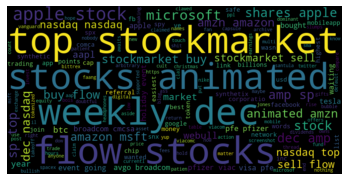

In [36]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
# word cloud visualization
allWords = ' '.join([twts for twts in df1['preTweets']])
wordCloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score< 0:
    return ('Negative')
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df1['analysis'] = df1['polarity'].apply(getAnalysis)
# Show the dataframe
df1[['text', 'preTweets', 'subjectivity', 'polarity', 'analysis']]

,text,preTweets,subjectivity,polarity,analysis
0,There s a Holiday Event going on in the...,there s holiday event going webull mobile app ...,0.000000,0.000000,Neutral
1,apple stocks rise by,apple stocks rise,0.000000,0.000000,Neutral
2,IL you can use multi touch to compare price ac...,il use multi touch compare price action arbitr...,0.350000,0.000000,Neutral
3,Synthetix Network Token SNX to list Synthe...,synthetix network token snx list synthetic sto...,0.000000,0.000000,Neutral
5,Synthetix Network Token SNX to list Syntheti...,synthetix network token snx list synthetic sto...,0.000000,0.000000,Neutral
14,Highest market cap in billions among stocks...,highest market cap billions stocks spx spy app...,0.000000,0.000000,Neutral
16,Apple AAPL With USD x With ...,apple aapl with usd x with btc in words btc aa...,0.000000,0.000000,Neutral
17,Facebook FB With USD x Wi...,facebook fb with usd x with btc in words btc f...,0.000000,0.000000,Neutral
19,Highest market cap in billions among stocks ...,highest market cap billions stocks spx spy app...,0.000000,0.000000,Neutral
20,Yup Apple and Microsoft making their own ...,yup apple microsoft making chips bullish chip ...,0.535714,0.285714,Positive


In [67]:
#  stores data on colab
df1.to_excel("output.xlsx",
             sheet_name='Sheet_name_1') 

In [69]:
# Exporting dataframe from colab to drive

#@title Default title text
#converting list of lists to csv file
# ['text', 'preTweets', 'subjectivity', 'polarity', 'analysis']

df2 = pd.DataFrame(df1, columns = ['ID','text', 'preTweets', 'subjectivity', 'polarity', 'analysis'])

df2.to_csv('/content/gdrive/MyDrive/B-Tech Project 20-21 Group 7/NLP datasets/RESULT DATASETS (1)/Apple-stocks' , sep = ",")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb60486ce48>],
      dtype=object)

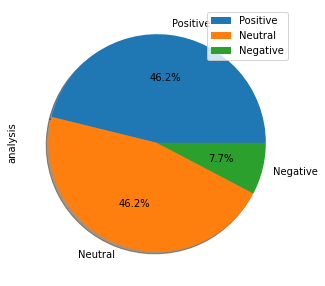

In [55]:
df1.analysis.value_counts().plot(kind='pie', subplots=True, shadow = True, figsize=(5,5), autopct='%1.1f%%',legend = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6049f9a58>],
      dtype=object)

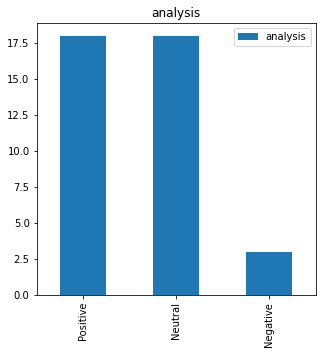

In [54]:
df1.analysis.value_counts().plot(kind='bar', subplots=True, figsize=(5,5),legend = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb604a3d390>],
      dtype=object)

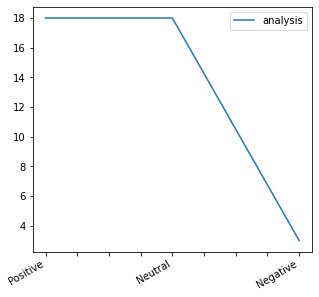

In [53]:
df1.analysis.value_counts().plot(kind='line', subplots=True, figsize=(5,5),legend = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb604907be0>],
      dtype=object)

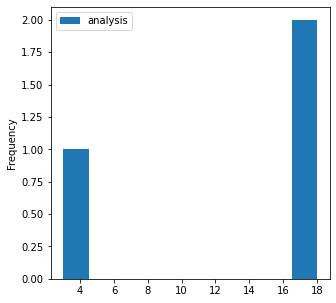

In [52]:
df1.analysis.value_counts().plot(kind='hist', subplots=True, figsize=(5,5),legend = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb604a10fd0>],
      dtype=object)

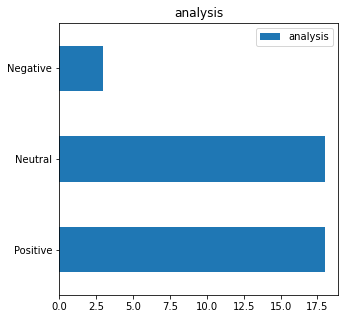

In [51]:
df1.analysis.value_counts().plot(kind='barh', subplots=True, figsize=(5,5),legend = True)

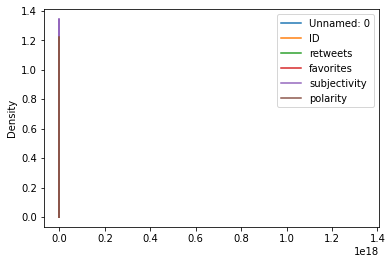

In [58]:
df1.plot.kde(bw_method = 0.5)

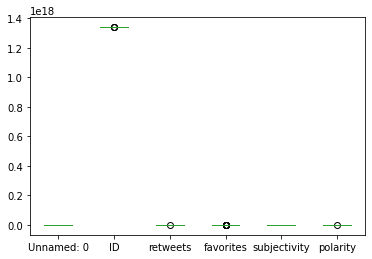

In [59]:
df1.plot.box()